In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.datasets import imdb
from keras import models, layers


In [3]:
# Load IMDB data with top 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Concatenate for EDA
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

print("Review example (encoded):", X_train[0])
print("Label example:", y_train[0])


Review example (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label example: 1


In [5]:
# Load vocabulary mapping
vocab = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in vocab.items()])

# Decode review for readability
decoded = " ".join([reverse_index.get(i - 3, "#") for i in data[0]])
print(decoded)


# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
lengths = [len(i) for i in data]
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))
print("Average Review Length:", np.mean(lengths))
print("Standard Deviation:", round(np.std(lengths)))


Categories: [0 1]
Number of unique words: 9998
Average Review Length: 234.75892
Standard Deviation: 173


In [9]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


<Axes: xlabel='label', ylabel='count'>

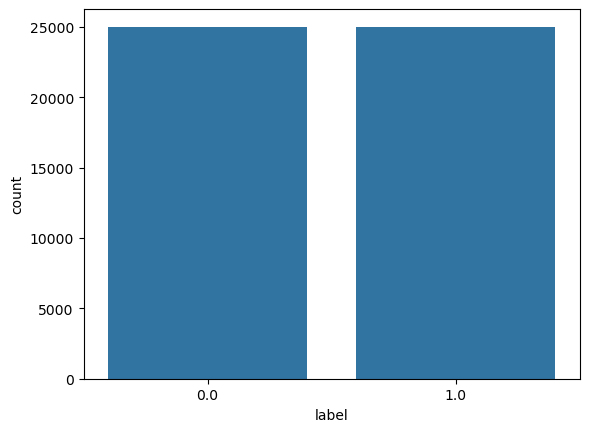

In [11]:
data = vectorize(data)
label = np.array(label).astype("float32")

# Plot label distribution
labelDF = pd.DataFrame({'label': label})
sns.countplot(x='label', data=labelDF)


In [13]:
# Custom train/test split
test_x = data[:10000]
test_y = label[:10000]
train_x = data[10000:]
train_y = label[10000:]

# Confirm shapes
print("Train shape:", train_x.shape)
print("Test shape:", test_x.shape)


Train shape: (40000, 10000)
Test shape: (10000, 10000)


In [15]:
model = models.Sequential()
model.add(layers.Dense(50, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()


C:\Users\adity\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [19]:
results = model.fit(
    train_x, train_y,
    epochs=2,
    batch_size=500,
    validation_data=(test_x, test_y),
    callbacks=[callback]
)


Epoch 1/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7235 - loss: 0.5312 - val_accuracy: 0.8950 - val_loss: 0.2628
Epoch 2/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9189 - loss: 0.2128 - val_accuracy: 0.8975 - val_loss: 0.2618


In [21]:
print("Validation Accuracy:", np.mean(results.history["val_accuracy"]))

score = model.evaluate(test_x, test_y, batch_size=500)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Validation Accuracy: 0.8962499797344208
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8984 - loss: 0.2594
Test loss: 0.2618396282196045
Test accuracy: 0.8974999785423279


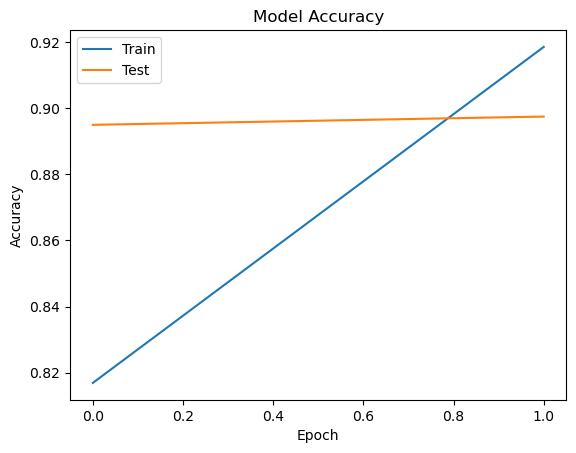

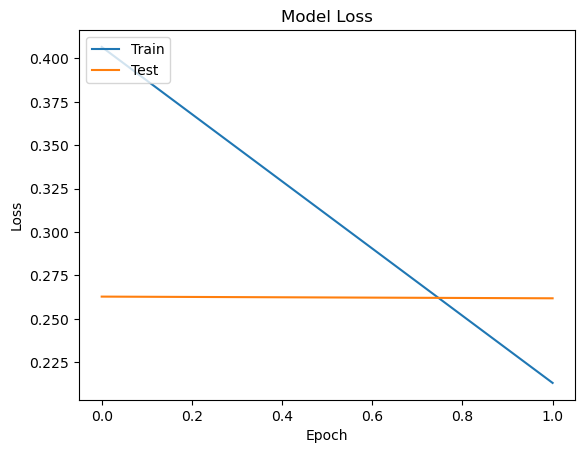

In [23]:
# Accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
